In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('E:\Anaconda\project files\skillbased\TestSklearn\winequality-red.csv')

Exploratory data analysis (EDA) :

In [4]:
print(data.shape)

(1599, 12)


In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So our dataset has no missing value.

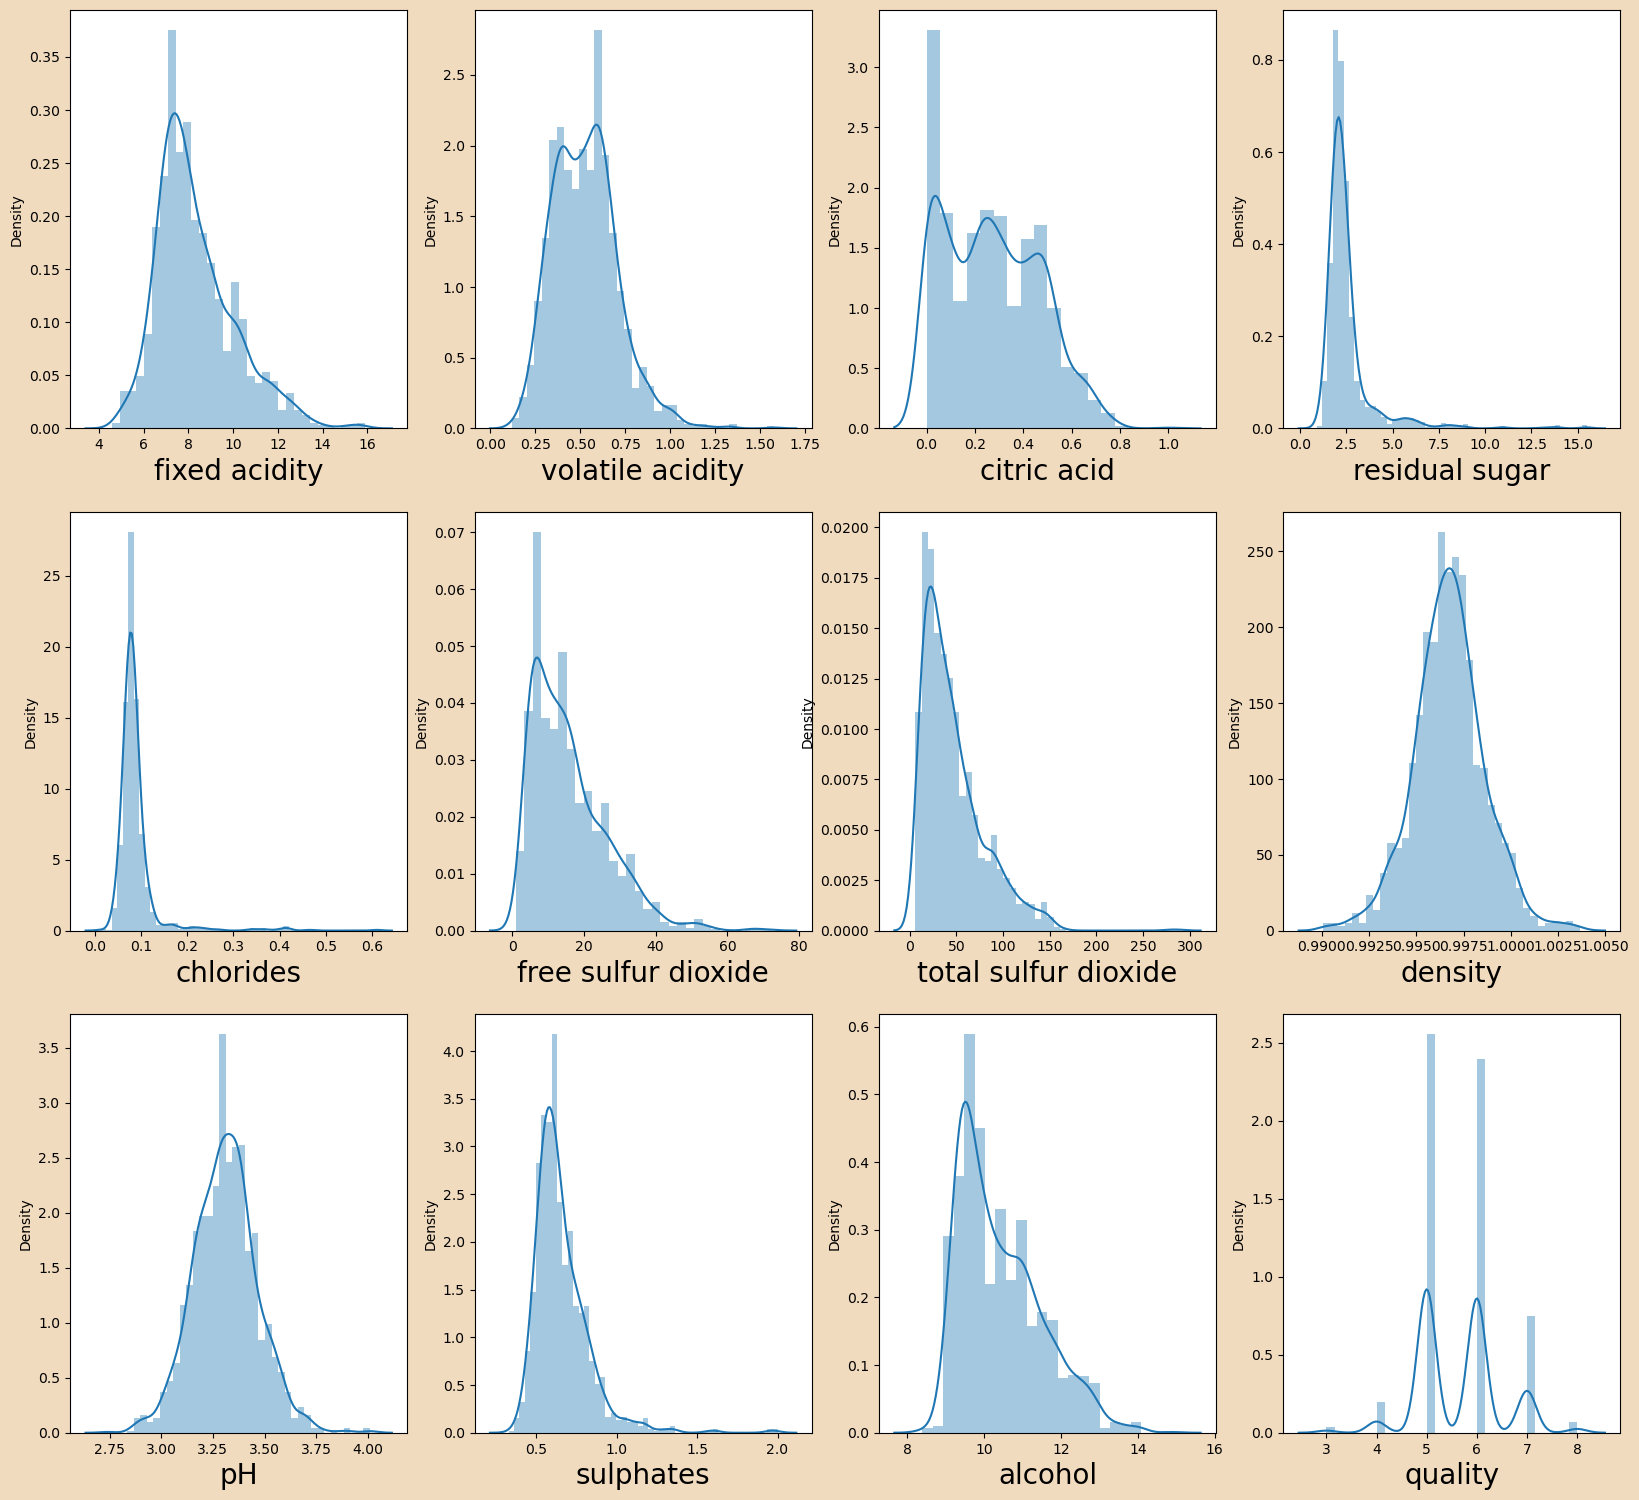

In [9]:
plt.figure(figsize=(20,25),facecolor='#F1DBBF')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

In [10]:
for column in data:
    print(column ," : ",data[column].skew()) #checking the skewness.

fixed acidity  :  0.9827514413284587
volatile acidity  :  0.6715925723840199
citric acid  :  0.3183372952546368
residual sugar  :  4.54065542590319
chlorides  :  5.680346571971722
free sulfur dioxide  :  1.250567293314441
total sulfur dioxide  :  1.515531257594554
density  :  0.07128766294927483
pH  :  0.19368349811284427
sulphates  :  2.4286723536602945
alcohol  :  0.8608288068888538
quality  :  0.21780157547366327


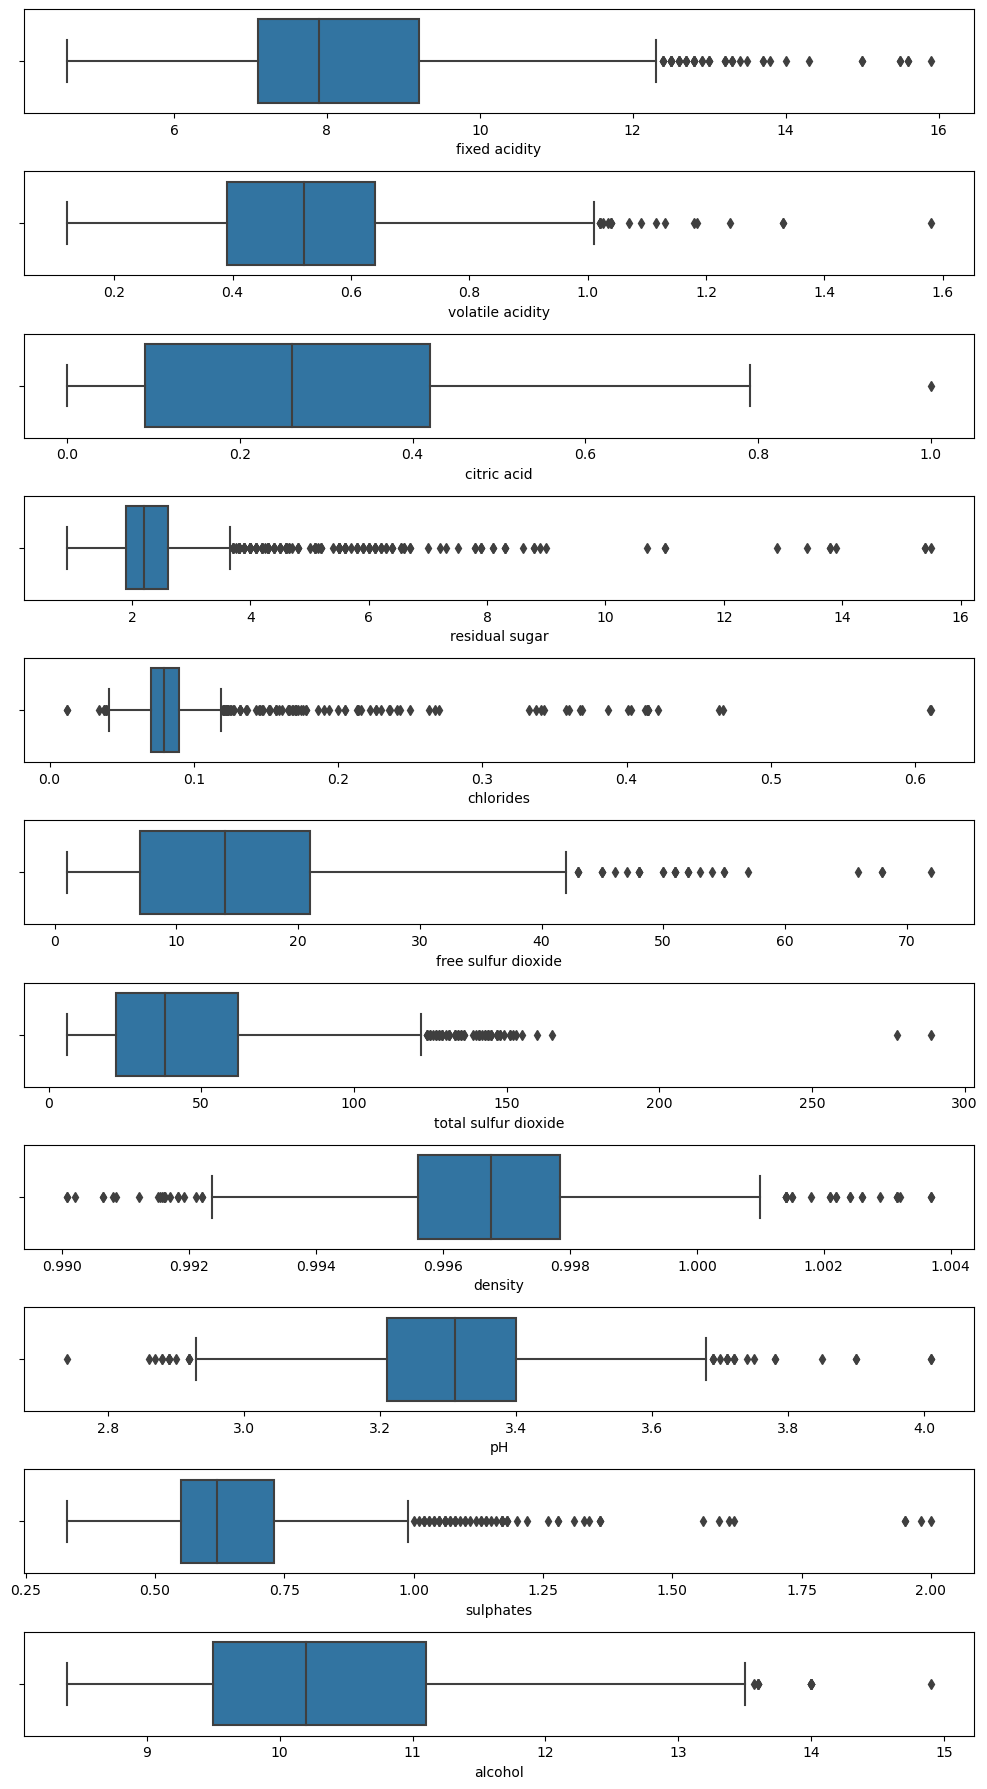

In [11]:
import warnings
with warnings.catch_warnings(record=True):
    fig,axs = plt.subplots(11,figsize=(10,18))
    plt1 = sns.boxplot(data['fixed acidity'],ax=axs[0])
    plt2 = sns.boxplot(data['volatile acidity'],ax=axs[1])
    plt3 = sns.boxplot(data['citric acid'],ax=axs[2])
    plt4 = sns.boxplot(data['residual sugar'],ax=axs[3])
    plt5 = sns.boxplot(data['chlorides'],ax=axs[4])
    plt6 = sns.boxplot(data['free sulfur dioxide'],ax=axs[5])
    plt7 = sns.boxplot(data['total sulfur dioxide'],ax=axs[6])
    plt8 = sns.boxplot(data['density'],ax=axs[7])
    plt9 = sns.boxplot(data['pH'],ax=axs[8])
    plt10 = sns.boxplot(data['sulphates'],ax=axs[9])
    plt11 = sns.boxplot(data['alcohol'],ax=axs[10])
    plt.tight_layout()

In [12]:
percentile25 = data['fixed acidity'].quantile(0.25)
percentile75 = data['fixed acidity'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
# new_data = data[data['fixed acidity'] < upper_limit]
new_data = data.copy()
new_data['fixed acidity'] = np.where(
new_data['fixed acidity']>upper_limit,upper_limit,
np.where(
    new_data['fixed acidity'] < lower_limit,lower_limit,
    new_data['fixed acidity']
    )
) 

In [13]:
percentile25_1 = data['volatile acidity'].quantile(0.25)
percentile75_1 = data['volatile acidity'].quantile(0.75)
iqr = percentile75_1 - percentile25_1
upper_limit1 = percentile75_1 + 1.5*iqr
lower_limit1 = percentile25_1 - 1.5*iqr
print(upper_limit1)
print(lower_limit1)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['volatile acidity'] = np.where(
new_data['volatile acidity']> upper_limit1,upper_limit1,
np.where(
    new_data['volatile acidity'] < lower_limit1,lower_limit1,
    new_data['volatile acidity']
    )
) 

1.0150000000000001
0.015000000000000013


In [14]:
percentile25_2 = data['citric acid'].quantile(0.25)
percentile75_2 = data['citric acid'].quantile(0.75)
iqr = percentile75_2 - percentile25_2
upper_limit2 = percentile75_2 + 1.5*iqr
lower_limit2 = percentile25_2 - 1.5*iqr
print(upper_limit2)
print(lower_limit2)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['citric acid'] = np.where(
new_data['citric acid']> upper_limit2,upper_limit2,
np.where(
    new_data['citric acid'] < lower_limit2,lower_limit2,
    new_data['citric acid']
    )
) 

0.9149999999999999
-0.4049999999999999


In [15]:
percentile25_3 = data['residual sugar'].quantile(0.25)
percentile75_3 = data['residual sugar'].quantile(0.75)
iqr = percentile75_3 - percentile25_3
upper_limit3 = percentile75_3 + 1.5*iqr
lower_limit3 = percentile25_3 - 1.5*iqr
print(upper_limit3)
print(lower_limit3)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['residual sugar'] = np.where(
new_data['residual sugar']> upper_limit3,upper_limit3,
np.where(
    new_data['residual sugar'] < lower_limit3,lower_limit3,
    new_data['residual sugar']
    )
) 

3.6500000000000004
0.8499999999999996


In [16]:
percentile25_4 = data['chlorides'].quantile(0.25)
percentile75_4 = data['chlorides'].quantile(0.75)
iqr = percentile75_4 - percentile25_4
upper_limit4 = percentile75_4 + 1.5*iqr
lower_limit4 = percentile25_4 - 1.5*iqr
print(upper_limit4)
print(lower_limit4)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['chlorides'] = np.where(
new_data['chlorides']> upper_limit4,upper_limit4,
np.where(
    new_data['chlorides'] < lower_limit4,lower_limit4,
    new_data['chlorides']
    )
) 

0.11999999999999998
0.04000000000000002


In [17]:
percentile25_5 = data['free sulfur dioxide'].quantile(0.25)
percentile75_5 = data['free sulfur dioxide'].quantile(0.75)
iqr = percentile75_5 - percentile25_5
upper_limit5 = percentile75_5 + 1.5*iqr
lower_limit5 = percentile25_5 - 1.5*iqr
print(upper_limit5)
print(lower_limit5)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['free sulfur dioxide'] = np.where(
new_data['free sulfur dioxide']> upper_limit5,upper_limit5,
np.where(
    new_data['free sulfur dioxide'] < lower_limit5,lower_limit5,
    new_data['free sulfur dioxide']
    )
) 

42.0
-14.0


In [18]:
percentile25_5 = data['free sulfur dioxide'].quantile(0.25)
percentile75_5 = data['free sulfur dioxide'].quantile(0.75)
iqr = percentile75_5 - percentile25_5
upper_limit5 = percentile75_5 + 1.5*iqr
lower_limit5 = percentile25_5 - 1.5*iqr
print(upper_limit5)
print(lower_limit5)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['free sulfur dioxide'] = np.where(
new_data['free sulfur dioxide']> upper_limit5,upper_limit5,
np.where(
    new_data['free sulfur dioxide'] < lower_limit5,lower_limit5,
    new_data['free sulfur dioxide']
    )
) 

42.0
-14.0


In [19]:
percentile25_6 = data['total sulfur dioxide'].quantile(0.25)
percentile75_6 = data['total sulfur dioxide'].quantile(0.75)
iqr = percentile75_6 - percentile25_6
upper_limit6 = percentile75_6 + 1.5*iqr
lower_limit6 = percentile25_6 - 1.5*iqr
print(upper_limit6)
print(lower_limit6)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['total sulfur dioxide'] = np.where(
new_data['total sulfur dioxide']> upper_limit6,upper_limit6,
np.where(
    new_data['total sulfur dioxide'] < lower_limit6,lower_limit6,
    new_data['total sulfur dioxide']
    )
) 

122.0
-38.0


In [20]:
percentile25_7 = data['density'].quantile(0.25)
percentile75_7 = data['density'].quantile(0.75)
iqr = percentile75_7 - percentile25_7
upper_limit7 = percentile75_7 + 1.5*iqr
lower_limit7 = percentile25_7 - 1.5*iqr
print(upper_limit7)
print(lower_limit7)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['density'] = np.where(
new_data['density']> upper_limit7,upper_limit7,
np.where(
    new_data['density'] < lower_limit7,lower_limit7,
    new_data['density']
    )
) 

1.0011875
0.9922475000000001


In [21]:
percentile25_8 = data['pH'].quantile(0.25)
percentile75_8 = data['pH'].quantile(0.75)
iqr = percentile75_8 - percentile25_8
upper_limit8 = percentile75_8 + 1.5*iqr
lower_limit8 = percentile25_8 - 1.5*iqr
print(upper_limit8)
print(lower_limit8)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['pH'] = np.where(
new_data['pH']> upper_limit8,upper_limit8,
np.where(
    new_data['pH'] < lower_limit8,lower_limit8,
    new_data['pH']
    )
) 

3.6849999999999996
2.925


In [22]:
percentile25_9 = data['sulphates'].quantile(0.25)
percentile75_9 = data['sulphates'].quantile(0.75)
iqr = percentile75_9 - percentile25_9
upper_limit9 = percentile75_9 + 1.5*iqr
lower_limit9 = percentile25_9 - 1.5*iqr
print(upper_limit9)
print(lower_limit9)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['sulphates'] = np.where(
new_data['sulphates']> upper_limit9,upper_limit9,
np.where(
    new_data['sulphates'] < lower_limit9,lower_limit9,
    new_data['sulphates']
    )
) 

0.9999999999999999
0.28000000000000014


In [23]:
percentile25_10 = data['alcohol'].quantile(0.25)
percentile75_10 = data['alcohol'].quantile(0.75)
iqr = percentile75_10 - percentile25_10
upper_limit10 = percentile75_10 + 1.5*iqr
lower_limit10 = percentile25_10 - 1.5*iqr
print(upper_limit10)
print(lower_limit10)
# new_data = data[data['volatile acidity'] < upper_limit]
new_data['alcohol'] = np.where(
new_data['alcohol']> upper_limit10,upper_limit10,
np.where(
    new_data['alcohol'] < lower_limit10,lower_limit10,
    new_data['alcohol']
    )
) 

13.5
7.1000000000000005


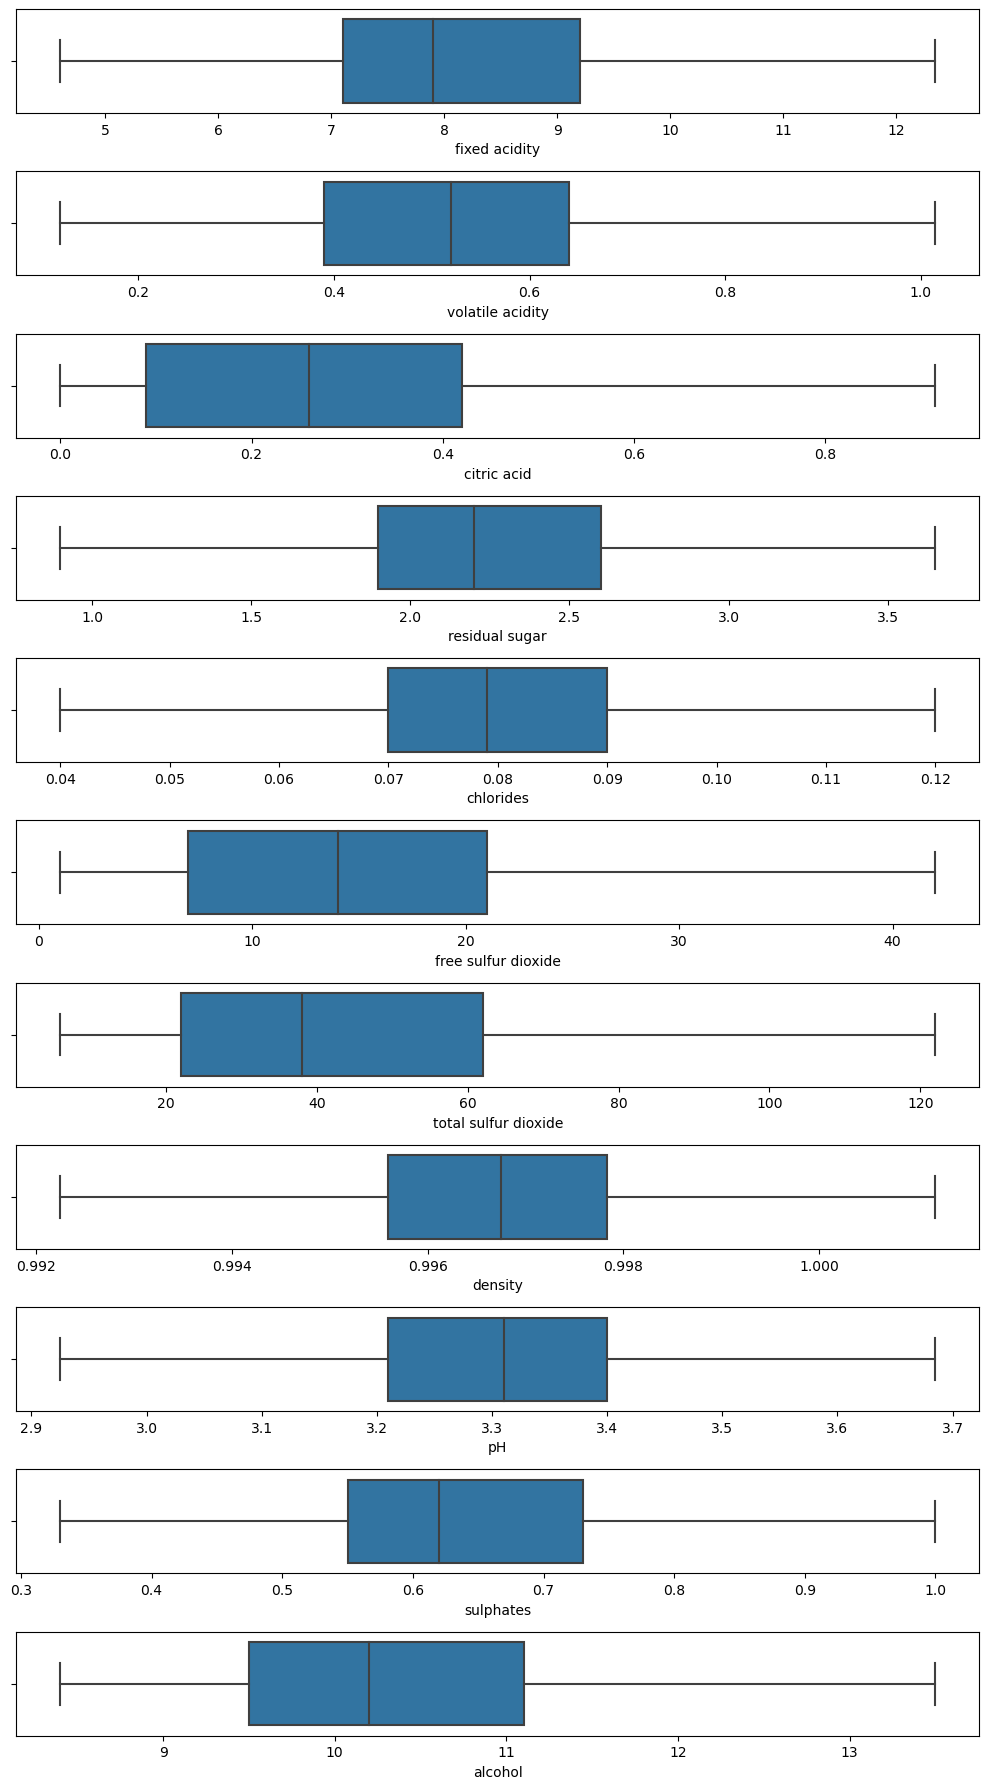

In [24]:
import warnings
with warnings.catch_warnings(record=True):
    fig,axs = plt.subplots(11,figsize=(10,18))
    plt1 = sns.boxplot(new_data['fixed acidity'],ax=axs[0])
    plt2 = sns.boxplot(new_data['volatile acidity'],ax=axs[1])
    plt3 = sns.boxplot(new_data['citric acid'],ax=axs[2])
    plt4 = sns.boxplot(new_data['residual sugar'],ax=axs[3])
    plt5 = sns.boxplot(new_data['chlorides'],ax=axs[4])
    plt6 = sns.boxplot(new_data['free sulfur dioxide'],ax=axs[5])
    plt7 = sns.boxplot(new_data['total sulfur dioxide'],ax=axs[6])
    plt8 = sns.boxplot(new_data['density'],ax=axs[7])
    plt9 = sns.boxplot(new_data['pH'],ax=axs[8])
    plt10 = sns.boxplot(new_data['sulphates'],ax=axs[9])
    plt11 = sns.boxplot(new_data['alcohol'],ax=axs[10])
    plt.tight_layout()

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

X = new_data.drop('quality', axis=1)
y = new_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('R-squared:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model is ',round(accuracy*100,2),'%')


cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# plt.figure(figsize=(20,10))
# plot_tree(model, filled=True, feature_names=X.columns)
# plt.show()

R-squared: 0.1150590798625658
Mean squared error: 0.55
The accuracy of the model is  55.62 %
Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   0  11   3   0   0]
 [  0   0 134  43   0   0]
 [  0   0  87 133   1   0]
 [  0   0   5  54   0   0]
 [  0   0   0   7   0   0]]


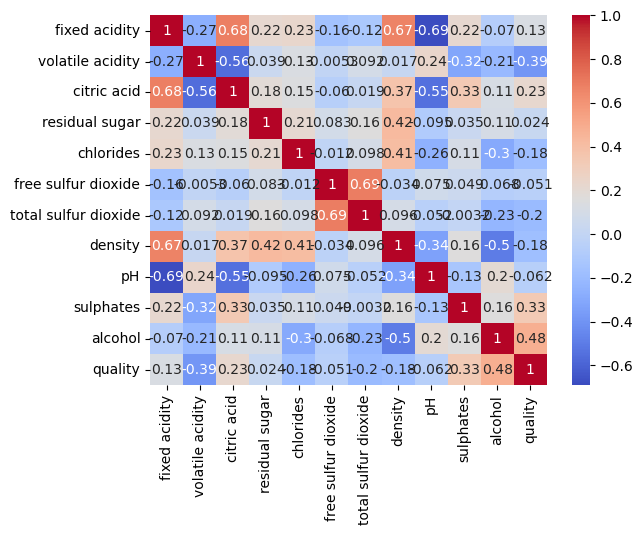

In [26]:
corr_matrix = new_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()